In [1]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224,224]
IMAGE_SIZE

[224, 224]

In [3]:
train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [4]:
print(train_path)
print(valid_path)

Dataset/Train
Dataset/Test


In [5]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 331s 6us/step


In [6]:
vgg

In [7]:
#don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [8]:
folders = glob('Dataset/Train/*')

In [9]:
#our layers-We can add more layers if we want
X = Flatten()(vgg.output)

In [10]:
X

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [11]:
prediction = Dense(len(folders),activation='softmax')(X)

In [12]:
prediction

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [13]:
model = Model(inputs=vgg.input,outputs=prediction)

In [14]:
model

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [19]:
train_datagen

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen

In [21]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2 images belonging to 2 classes.


In [22]:
training_set

In [23]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2 images belonging to 2 classes.


In [24]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\KRUSHNA\AppData\Local\Temp\ipykernel_36960\708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.7123 - accuracy: 0.5000 - val_loss: 0.4079 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 740ms/step - loss: 1.0378 - accuracy: 0.5000 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 756ms/step - loss: 0.1082 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 772ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 9.4153e-04 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 777ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 4.9798e-04 - val_accuracy: 1.0000


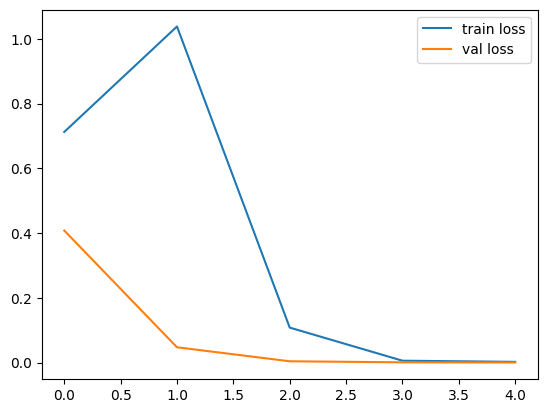

<Figure size 640x480 with 0 Axes>

In [25]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

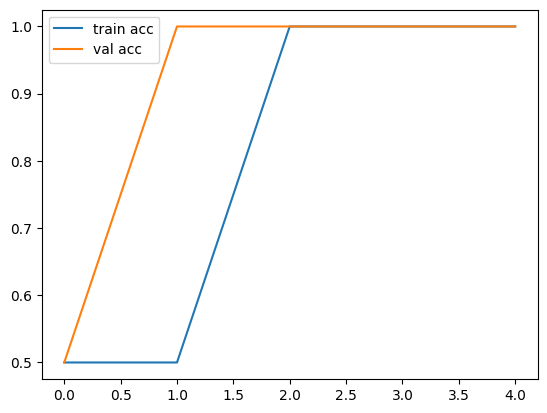

<Figure size 640x480 with 0 Axes>

In [27]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [28]:
model.save('facefeatures_new_model.h5')

# New Section